In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

<h2 style='color:green'>Data description</h2>

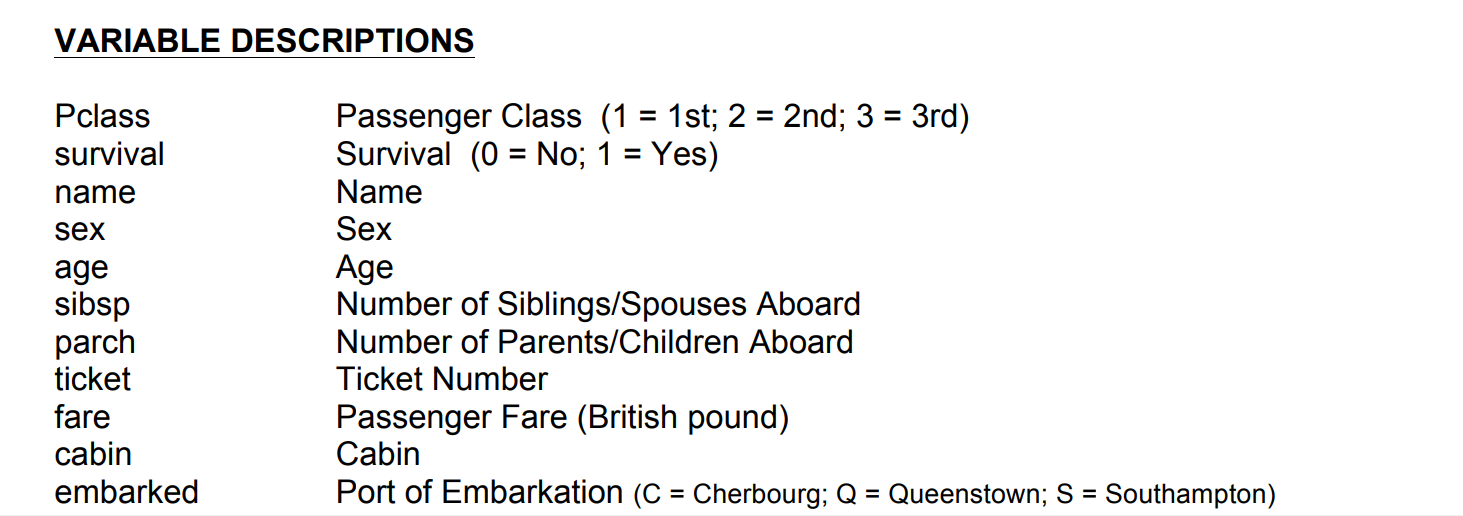

In [2]:
data = pd.read_csv('titanic_train.csv', index_col='PassengerId')

In [3]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.describe() 

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<p style='color:red'>Numeric data description shows that there is missing information in Age column <br>
There is several methods to fill missing column data, for example fill in with median discrete value or use another model<br>
for example linear regressor trained on other columns. For simplicity let's first use median value 28.0</p>

<h2 style='color: green'>Data cleaning and preprocessing steps</h2>

In [5]:
median = data['Age'].median()

In [6]:
data['Age'] = data['Age'].fillna(median)

In [7]:
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [8]:
# drop Name and Ticket columns as they seems unrelevant for survival prediction
data = data.drop(columns=['Name', 'Ticket'])

In [9]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S


In [10]:
#Change column Cabin: 1 if person had cabin 0 otherwise
cabin_presence = 1 - data['Cabin'].isnull()
data['Cabin'] = cabin_presence

In [11]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,0,S
2,1,1,female,38.0,1,0,71.2833,1,C
3,1,3,female,26.0,0,0,7.9250,0,S
4,1,1,female,35.0,1,0,53.1000,1,S
5,0,3,male,35.0,0,0,8.0500,0,S
6,0,3,male,28.0,0,0,8.4583,0,Q
7,0,1,male,54.0,0,0,51.8625,1,S
8,0,3,male,2.0,3,1,21.0750,0,S
9,1,3,female,27.0,0,2,11.1333,0,S


In [12]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [13]:
#Change nan value in Embarked column to N character
data['Embarked'] = data['Embarked'].fillna('N')

In [14]:
data['Embarked'].unique()

array(['S', 'C', 'Q', 'N'], dtype=object)

In [15]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,0,S
2,1,1,female,38.0,1,0,71.2833,1,C
3,1,3,female,26.0,0,0,7.9250,0,S
4,1,1,female,35.0,1,0,53.1000,1,S
5,0,3,male,35.0,0,0,8.0500,0,S
6,0,3,male,28.0,0,0,8.4583,0,Q
7,0,1,male,54.0,0,0,51.8625,1,S
8,0,3,male,2.0,3,1,21.0750,0,S
9,1,3,female,27.0,0,2,11.1333,0,S


In [16]:
# prepare one hot encoder for categorical data like: Pclass, Sex with first col drop patameter, as condition of n-1
# categorical variables defines last column state
encoder = OneHotEncoder(drop='first')
preprocess_cols = ['Sex', 'Embarked']
preprocess_data = data[preprocess_cols]

In [17]:
one_hot = encoder.fit_transform(preprocess_data)

In [18]:
encoded_arr = one_hot.toarray()

In [19]:
#first column here defines whether person is man(1) or woman(0)
#next 3 columns defines whether Embarked values are N,Q,S respectively
# Change encoded Sex and Embarked columns
data['Sex'] = encoded_arr[:, 0]
data['Embarked_N'] = encoded_arr[:, 1]
data['Embarked_Q'] = encoded_arr[:, 2]
data['Embarked_S'] = encoded_arr[:, 3]

data = data.drop(columns=['Embarked'])

In [20]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_N,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,1.0,22.0,1,0,7.2500,0,0.0,0.0,1.0
2,1,1,0.0,38.0,1,0,71.2833,1,0.0,0.0,0.0
3,1,3,0.0,26.0,0,0,7.9250,0,0.0,0.0,1.0
4,1,1,0.0,35.0,1,0,53.1000,1,0.0,0.0,1.0
5,0,3,1.0,35.0,0,0,8.0500,0,0.0,0.0,1.0
6,0,3,1.0,28.0,0,0,8.4583,0,0.0,1.0,0.0
7,0,1,1.0,54.0,0,0,51.8625,1,0.0,0.0,1.0
8,0,3,1.0,2.0,3,1,21.0750,0,0.0,0.0,1.0
9,1,3,0.0,27.0,0,2,11.1333,0,0.0,0.0,1.0


<p style='color:red'>Now when data is ready to work with...</p>

<h2 style='color: blue'>Task 1 (Train model without categorical data)</h2>

In [21]:
def numpy2dataframe(columns, array):
    data_dict = {}
    for i, col_name in enumerate(columns):
        data_dict[col_name] = array[:, i]
    return pd.DataFrame(data_dict)

In [22]:
y = data['Survived']
X = data.drop(columns=['Survived'])

In [23]:
categorical_cols = ['Sex', 'Cabin', 'Embarked_N', 'Embarked_Q', 'Embarked_S']
X_numeric = X.drop(columns=categorical_cols)
X_numeric_train, X_numeric_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

In [24]:
#scale numeric train data
data_columns = X_numeric_train.columns
scaler = StandardScaler().fit(X_numeric_train)
data_arr = scaler.transform(X_numeric_train)

In [25]:
X_train_scaled = numpy2dataframe(data_columns, data_arr)

In [26]:
#look at data columns distributions and correlation with pairplot

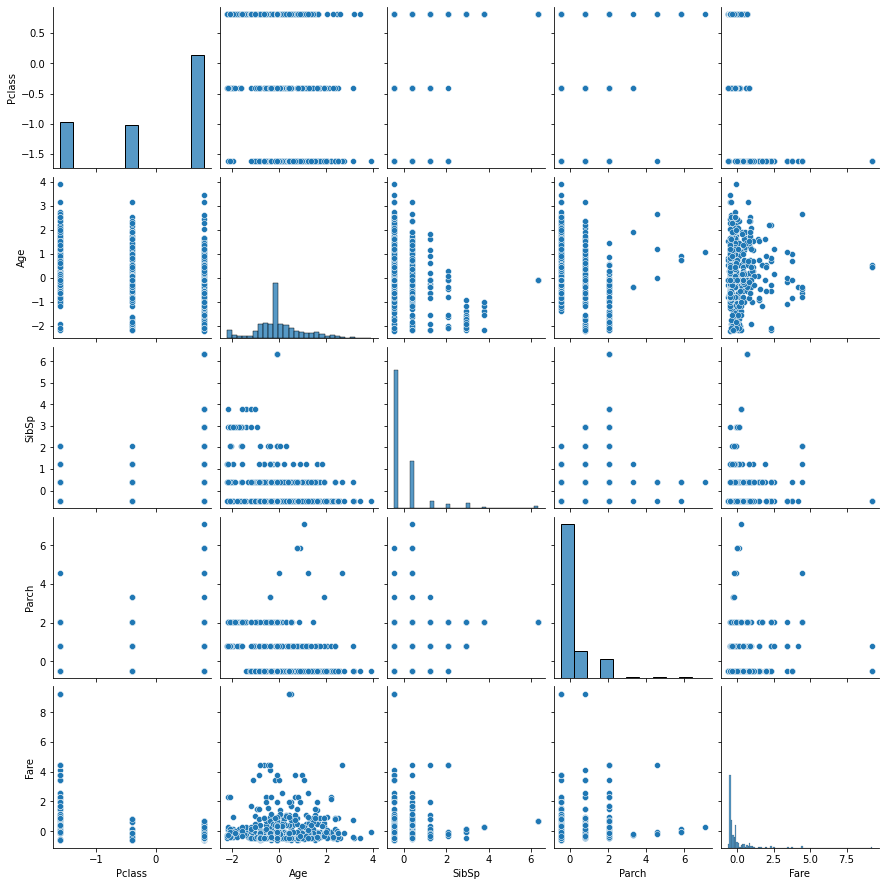

In [27]:
sns.pairplot(X_train_scaled)

<p style='color:red'>There is no explicit correlation in data</p>

In [28]:
X_train_scaled.describe()

,Pclass,Age,SibSp,Parch,Fare
count,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02
mean,9.355812e-17,1.746418e-17,1.746418e-17,2.245395e-17,5.363999e-17
std,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00
min,-1.614136e+00,-2.214363e+00,-4.707224e-01,-4.793416e-01,-6.274674e-01
25%,-4.005512e-01,-5.542135e-01,-4.707224e-01,-4.793416e-01,-4.748670e-01
50%,8.130337e-01,-9.263364e-02,-4.707224e-01,-4.793416e-01,-3.491435e-01
75%,8.130337e-01,4.458762e-01,3.799232e-01,-4.793416e-01,-4.017244e-02
max,8.130337e-01,3.907725e+00,6.334442e+00,7.104908e+00,9.237724e+00


In [29]:
X_numeric_test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,179.000000,179.000000,179.000000,179.000000,179.000000
mean,2.223464,29.987877,0.402235,0.391061,30.684473
std,0.877501,13.083969,0.730703,0.863185,39.447725
min,1.000000,0.830000,0.000000,0.000000,0.000000
25%,1.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.500000
75%,3.000000,36.000000,1.000000,0.000000,32.410400
max,3.000000,71.000000,4.000000,5.000000,262.375000


<p style='color: red'>Data describes statistics of train, test splits are quite similar.<p>

<AxesSubplot:>

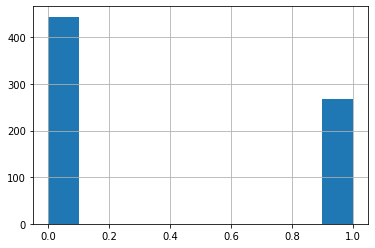

In [30]:
y_train.hist()

<AxesSubplot:>

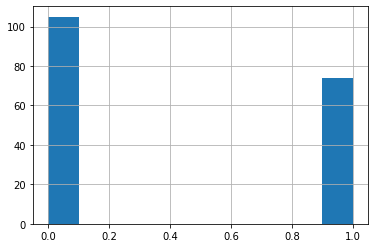

In [31]:
y_test.hist()

In [32]:
# training model using Gridsearch to find optimal model

model = LogisticRegression()
params = {
    'penalty': ['none','l2'],
    'C': np.arange(0.01, 0.3, 0.01),
    'solver':['lbfgs','saga'],
    'max_iter': [5000]
}
search = GridSearchCV(model, params)

In [33]:
search.fit(X_train_scaled, y_train)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C a

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C a

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C a

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C a

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C a

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C a

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C a

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29]),
                         'max_iter': [5000], 'penalty': ['none', 'l2'],
                         'solver': ['lbfgs', 'saga']})

In [34]:
best_model_numeric = search.best_estimator_

In [35]:
best_model_numeric.get_params()

{'C': 0.09,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 5000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [36]:
#scale test data
test_data_arr = scaler.transform(X_numeric_test)
X_test_scaled = numpy2dataframe(data_columns, test_data_arr)

In [37]:
#Evaluating model on train and test data
train_score = best_model_numeric.score(X_train_scaled, y_train)

In [38]:
train_score

0.6952247191011236

In [39]:
test_score = best_model_numeric.score(X_test_scaled, y_test)

In [40]:
test_score

0.7262569832402235

<p style='color:red'>Even though train and test data distridution is similar, trained model appeared<br>to show better performance on
test than train set with Accuracy metric. Looks like low data amount infers this results. Later we will try<br>
another metrics that will be more appropriate in this situation</p>

<h2 style='color:blue'>Task 2 (separated models for men and women)</h2>

In [41]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_N,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,1.0,22.0,1,0,7.2500,0,0.0,0.0,1.0
2,1,0.0,38.0,1,0,71.2833,1,0.0,0.0,0.0
3,3,0.0,26.0,0,0,7.9250,0,0.0,0.0,1.0
4,1,0.0,35.0,1,0,53.1000,1,0.0,0.0,1.0
5,3,1.0,35.0,0,0,8.0500,0,0.0,0.0,1.0


In [42]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [43]:
# split with assuring men and women amount similarity in train and test datasets
X['Survived'] = y
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['Sex'])
X_test_2['Survived'] = y_test_2

<AxesSubplot:>

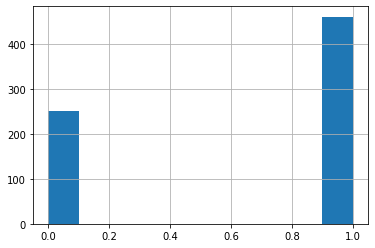

In [44]:
X_train_2['Sex'].hist()

<AxesSubplot:>

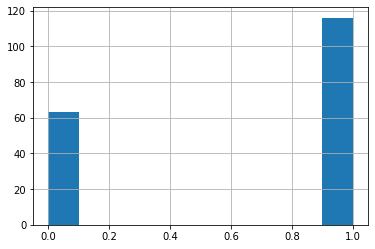

In [45]:
X_test_2['Sex'].hist()

In [46]:
X_train_2['Sex'].mean() - X_test_2['Sex'].mean()

-0.0005727826250705448

In [47]:
X_train_2['Sex'].std() - X_test_2['Sex'].std()

-0.000826600664700694

<p style='color: red'>Stratifying by Sex column assured required conditions, class distributions are almost identical</p>

In [48]:
def get_best_model(X, y):
    params = {
    'penalty': ['l1','l2'],
    'C': np.arange(0.01, 0.3, 0.01),
    'solver':['lbfgs','saga'],
    'max_iter': [10000]
    }
    search = GridSearchCV(LogisticRegression(), params).fit(X, y)
    
    return search.best_estimator_

In [49]:
women_train = X_train_2[X_train_2['Sex'] == 0]
y_women = women_train['Survived']
men_train = X_train_2[X_train_2['Sex'] == 1]
y_men = men_train['Survived']

# drop Survived column from train data
women_train = women_train.drop(columns=['Survived'])
men_train = men_train.drop(columns=['Survived'])

<AxesSubplot:>

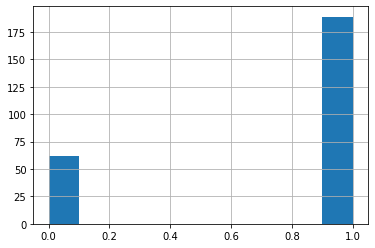

In [50]:
y_women.hist()

<AxesSubplot:>

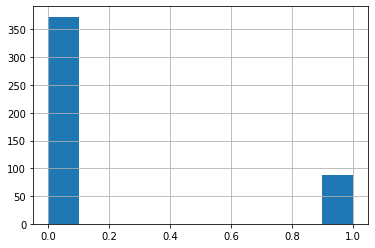

In [51]:
y_men.hist()

<p style='color: red'>As histogram shows, most men died in this ship crash, whereas most women survived</p>

In [52]:
best_model_for_women = get_best_model(women_train, y_women)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
145 fits failed out of a total of 580.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
145 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\admin\AppData\Local\Programs\P

In [53]:
best_model_for_men = get_best_model(men_train, y_men)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
145 fits failed out of a total of 580.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
145 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\admin\AppData\Local\Programs\P

In [54]:
# Prepare test data
women_test = X_test_2[X_test_2['Sex'] == 0]
y_women_test = women_test['Survived']
men_test = X_test_2[X_test_2['Sex'] == 1]
y_men_test = men_test['Survived']

# drop Survived column from train data
women_test = women_test.drop(columns=['Survived'])
men_test = men_test.drop(columns=['Survived'])

In [55]:
# checking model performance on women train and test data
train_women_score = best_model_for_women.score(women_train, y_women)

In [56]:
train_women_score

0.8207171314741036

In [57]:
test_women_score = best_model_for_women.score(women_test, y_women_test)

In [58]:
test_women_score

0.7936507936507936

<p style='color: red'>Train performance for women data a bit higher, <br>looks like model is overfitted but general performance comparing
to previous model is obviously higher on 8-10%</p>

In [59]:
# checking model performance on men train and test data
train_men_score = best_model_for_men.score(men_train, y_men)

In [60]:
train_men_score

0.8199566160520607

In [61]:
test_men_score = best_model_for_men.score(men_test, y_men_test)

In [62]:
test_men_score

0.8448275862068966

<p style='color: red'>Here we see anomalies as test score is higher than train score. Because of lack of data easier
rows to recognize appeared to be in test set. But anyway performance is much higher than in previous model<p>

<h2 style='color: blue'>Task 3 (Separated models for Embarked column split)</h2>

In [63]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_N,Embarked_Q,Embarked_S,Survived
PassengerId,,,,,,,,,,,
1,3,1.0,22.0,1,0,7.2500,0,0.0,0.0,1.0,0
2,1,0.0,38.0,1,0,71.2833,1,0.0,0.0,0.0,1
3,3,0.0,26.0,0,0,7.9250,0,0.0,0.0,1.0,1
4,1,0.0,35.0,1,0,53.1000,1,0.0,0.0,1.0,1
5,3,1.0,35.0,0,0,8.0500,0,0.0,0.0,1.0,0


In [64]:
X[X['Embarked_N'] == 1]
#We may delete 2 rows where there is no information about embarked port

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_N,Embarked_Q,Embarked_S,Survived
PassengerId,,,,,,,,,,,
62,1,0.0,38.0,0,0,80.0,1,1.0,0.0,0.0,1
830,1,0.0,62.0,0,0,80.0,1,1.0,0.0,0.0,1


In [65]:
X = X[X['Embarked_N'] == 0]
X = X.drop(columns=['Embarked_N'])
y = y.drop([62, 830])

In [66]:
# Now we can split our data by Embarked columns

In [67]:
X['Stratify'] = X['Embarked_Q'].astype('str') + '_' + X['Embarked_S'].astype('str')
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['Stratify'])

<AxesSubplot:>

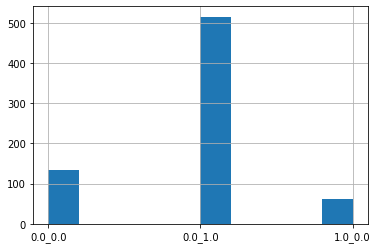

In [68]:
X_train_3['Stratify'].hist()

<AxesSubplot:>

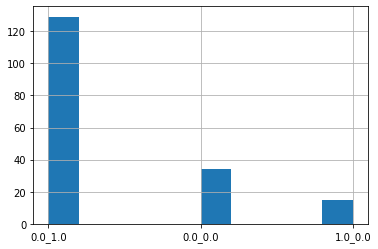

In [69]:
X_test_3['Stratify'].hist()

In [70]:
#Distribution by Embarked is identical 
X_train_3 = X_train_3.drop(columns=['Stratify', 'Survived'])

In [71]:
X_train_C = X_train_3[(X_train_3['Embarked_Q'] == 0) & (X_train_3['Embarked_S'] == 0)]
X_train_Q = X_train_3[X_train_3['Embarked_Q'] == 1.0]
X_train_S = X_train_3[X_train_3['Embarked_S'] == 1.0]

In [72]:
y_train_C = y[X_train_C.index]
y_train_Q = y[X_train_Q.index]
y_train_S = y[X_train_S.index]

In [75]:
# Now we are ready to train models for every embarked port type

In [76]:
best_model_C = get_best_model(X_train_C, y_train_C)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
145 fits failed out of a total of 580.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
145 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\admin\AppData\Local\Programs\P

In [77]:
best_model_Q = get_best_model(X_train_Q, y_train_Q)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
145 fits failed out of a total of 580.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
145 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\admin\AppData\Local\Programs\P

In [79]:

best_model_S = get_best_model(X_train_S, y_train_S)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
145 fits failed out of a total of 580.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
145 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\admin\AppData\Local\Programs\P

In [80]:
X_test_3 = X_test_3.drop(columns=['Stratify'])
X_test_C = X_test_3[(X_test_3['Embarked_Q'] == 0) & (X_test_3['Embarked_S'] == 0)]
X_test_Q = X_test_3[X_test_3['Embarked_Q'] == 1.0]
X_test_S = X_test_3[X_test_3['Embarked_S'] == 1.0]
y_test_C = y[X_test_C.index]
y_test_Q = y[X_test_Q.index]
y_test_S = y[X_test_S.index]


In [88]:
X_test_C = X_test_C.drop(columns=['Survived'])
X_test_Q = X_test_Q.drop(columns=['Survived'])
X_test_S = X_test_S.drop(columns=['Survived'])

In [89]:
train_C_score = best_model_C.score(X_train_C, y_train_C)
train_Q_score = best_model_Q.score(X_train_Q, y_train_Q)
train_S_score = best_model_S.score(X_train_S, y_train_S)

test_C_score = best_model_C.score(X_test_C, y_test_C)
test_Q_score = best_model_Q.score(X_test_Q, y_test_Q)
test_S_score = best_model_S.score(X_test_S, y_test_S)

In [90]:
print('train C: ', train_C_score, 'test C: ', test_C_score)
print('train Q: ', train_Q_score, 'test Q: ', test_Q_score)
print('train S: ', train_S_score, 'test S: ', test_S_score)

train C:  0.7910447761194029 test C:  0.7058823529411765
train Q:  0.8709677419354839 test Q:  0.8666666666666667
train S:  0.8174757281553398 test S:  0.751937984496124


<p style='color: red'>As metrics shows, models, trained depending on embarked port generalizes poorly because of
lack of samples in some classes(nearly 100 that is hard to train on). Also it is hard to believe that embarked port is really important feature for survival prediction so such split could add unnecessary noice that leads to overfit and problems with extracting important data features</p>

<h1 style='color: blue'>Models comparing</h1>

<p style='color: green; font-size: 20px'>Now, relying on accuracy metric we may conclude that second model with split by Sex column shows much better generalization ability than other models and less overfit comparing to 3 model for example. Therefore at this stage I propose second model for use in survival prediction task</p>

<p style='color: green; font-size: 20px'>But there is much more apropriate metrics for this task such as Precision and Recall. Let's think a bit why they are so good and what useful information they may give in our exploration.<br>
Precision here shows how many people really survived of those who model predicted to be alive. <br>
We desire for our model to show high precision score because it would be bad to give parents wrong hope of their child survival and we want to inform correctly as many relatives as possible<br>
Recall metric shows how many people that really survived, our model predicted correctly and showed they survival<br>
We also want this metric to be high as low score will lead to bad general performance of model</p>

In [91]:
# evaluating first model
y_true = y_test
y_pred = best_model_numeric.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_true, y_pred)

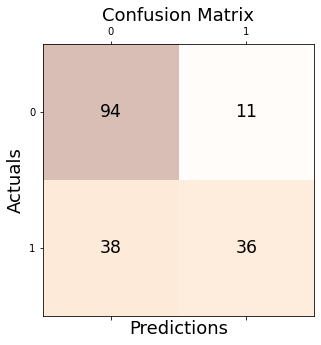

In [92]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [93]:
#Accuracy metric score
accuracy_score(y_true, y_pred)

0.7262569832402235

In [94]:
#Precision metric
precision_score(y_true, y_pred)

0.7659574468085106

In [95]:
#Recall score
recall_score(y_true, y_pred)

0.4864864864864865

In [96]:
#F1 score
f1_score(y_true, y_pred)

0.5950413223140495

<h2 style='color:blue'>Second model metrics</h2>

In [97]:
y_true_women = y_women_test
y_pred_women = best_model_for_women.predict(women_test)

In [98]:
conf_matrix_women = confusion_matrix(y_true_women, y_pred_women)

In [99]:
conf_matrix_women

array([[ 8, 11],
       [ 2, 42]], dtype=int64)

In [100]:
y_true_men = y_men_test
y_pred_men = best_model_for_men.predict(men_test)

In [101]:
conf_matrix_man = confusion_matrix(y_true_men, y_pred_men)

In [102]:
conf_matrix_man

array([[94,  1],
       [17,  4]], dtype=int64)

In [103]:
y_true_merged = y_true_women.append(y_true_men)
y_pred_merged =np.array(list(y_pred_women)+list(y_pred_men))

C:\Users\admin\AppData\Local\Temp\ipykernel_11452\1830503923.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_true_merged = y_true_women.append(y_true_men)


In [104]:
#Accuracy
accuracy_score(y_true_merged, y_pred_merged)

0.8268156424581006

In [105]:
#Precision
precision_score(y_true_merged, y_pred_merged)

0.7931034482758621

In [106]:
#Recall
recall_score(y_true_merged, y_pred_merged)

0.7076923076923077

In [107]:
#F1 score
f1_score(y_true_merged, y_pred_merged)

0.7479674796747967

<h2 style='color: blue'>Third model</h2>

In [108]:
y_true_C = y_test_C
y_true_Q = y_test_Q
y_true_S = y_test_S
pred_C = best_model_C.predict(X_test_C)
pred_Q = best_model_Q.predict(X_test_Q)
pred_S = best_model_S.predict(X_test_S)

In [109]:
y_true_all = list(y_true_C) + list(y_true_Q) + list(y_true_S)
y_pred_all = list(pred_C) + list(pred_Q) + list(pred_S)

In [110]:
#Accuracy
accuracy_score(y_true_all, y_pred_all)

0.7528089887640449

In [111]:
#Precision
precision_score(y_true_all, y_pred_all)

0.671875

In [112]:
#Recall
recall_score(y_true_all, y_pred_all)

0.6515151515151515

In [113]:
#F1 score
f1_score(y_true_all, y_pred_all)

0.6615384615384616

In [114]:
#1 model roc auc score
roc_auc_score(y_true, y_pred)

0.6908622908622909

In [115]:
#2 model roc auc score
roc_auc_score(y_true_merged, y_pred_merged)

0.8012145748987854

In [116]:
#3 model roc auc score
roc_auc_score(y_true_all, y_pred_all)

0.7320075757575757

<h2>In general second model showed much better performance than others, precision and recall scores are higher and as result f1 score. F1 score is quite good average metric between precision and recall, but we also could try Fbeta score with beta value 1.25 or 1.5 as precision is more important metric for relatives informing task, but here model 2 will show better results too</h2>